# Titanic Predictor Notebook

## Imports and Get Data

In [135]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.6 MB/s eta 0:00:0000:0100:010m


In [149]:
!pip install bentoml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.6/929.6 kB 4.0 MB/s eta 0:00:0000:0100:01
  Using cached schema-0.7.5-py2.py3-none-any.whl (17 kB)
  Using cached deepmerge-1.1.0-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.3 MB/s eta 0:00:00
  Using cached python-multipart-0.0.5.tar.gz (32 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.7/360.7 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.7 MB/s eta 0:00:00
  Using cached simple_di-0.1.5-py3-none-any.whl (9.8 kB)
  Using cached python_json_logger-2.0.4-py3-none-any.whl (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 16.8 MB/s eta 0:00:00
  Using cached watchfiles-0.18.1-cp37-abi3-macosx_10_7_x86_64.whl (377 kB)
  Using cached cattrs-22.2.0-py3-none-any.whl (35 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.2 MB/s eta 0:00:00
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached contextlib2-21.6.0-py2.py3-none-any.whl (13 kB)
  Created wheel for python-multipart: filename=python_multipart-0.0.5-py3-none-any.whl size=31671 sha256=4d3564ffcfcadb7b380cb5792393fc38dbb5c053a377f684ce8f486cc0a9f068
  Stored in directory: /Users/adam/Library/Caches/pip/wheels/fe/04/d1/a10661cc45f03c3cecda50deb2d2c22f57b4e84a75b2a5987e
Successfully built python-multipart
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [150]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import bentoml

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(2.5,2.5)
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Load train and test data into separate dataframes
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [18]:
# Combine train and test data into one dataframe
df = train_df.append(test_df, ignore_index=True)

## EDA

In [19]:
# Check the first few rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# Check the number of rows and columns in the dataframe
print(df.shape)

(1309, 12)


In [21]:
# Check the data types of each column
print(df.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [22]:
# Check for missing values in each column
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


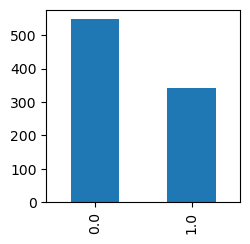

In [23]:
# Bar plot of the target variable (Survived)
df['Survived'].value_counts().plot(kind='bar')
plt.show()

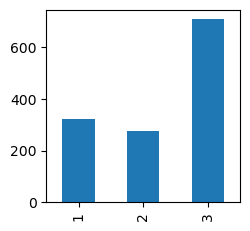

In [24]:
# Bar plot of Pclass
df['Pclass'].value_counts().sort_index().plot(kind='bar')
plt.show()

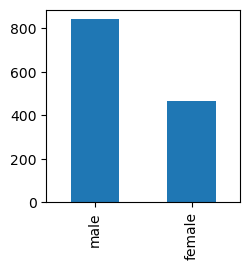

In [25]:
# Bar plot of Sex
df['Sex'].value_counts().plot(kind='bar')
plt.show()

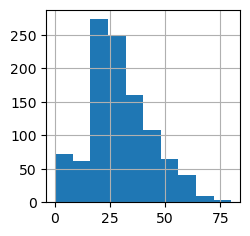

In [26]:
# Histogram of Age
df['Age'].hist()
plt.show()

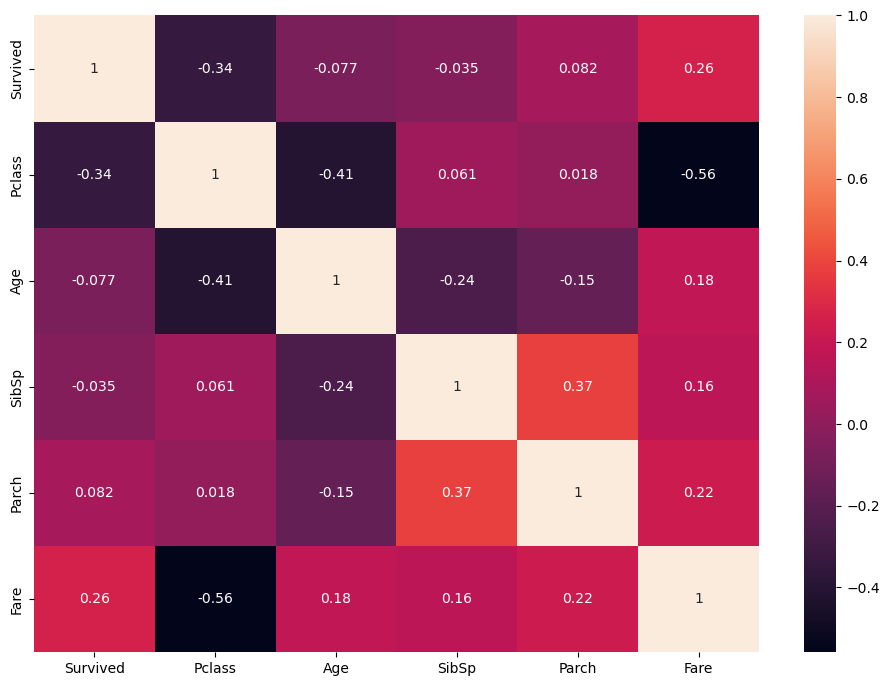

In [35]:
# Create a correlation matrix
corr = df.drop(['PassengerId'], axis=1).corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)
plt.rcParams['figure.figsize'] = 15, 15
plt.show()

In [37]:
# Create a new dataframe with only the Name and Survived columns
name_df = df[['Name', 'Survived']]

# Split the dataframe into two based on Survived
not_survived = name_df[name_df['Survived'] == 0]
survived = name_df[name_df['Survived'] == 1]

# Get the 5 most common names for those who did not survive
not_survived_names = not_survived['Name'].str.split(expand=True)[2].value_counts().nlargest(5)
print("5 most common names of those who did not survive:")
print(not_survived_names)

# Get the 5 most common names for those who did survive
survived_names = survived['Name'].str.split(expand=True)[2].value_counts().nlargest(5)
print("5 most common names of those who did survive:")
print(survived_names)

5 most common names of those who did not survive:
William    32
John       23
Thomas     12
Mr.        11
James      10
Name: 2, dtype: int64
5 most common names of those who did survive:
William    16
Anna        9
John        8
Thomas      7
George      6
Name: 2, dtype: int64


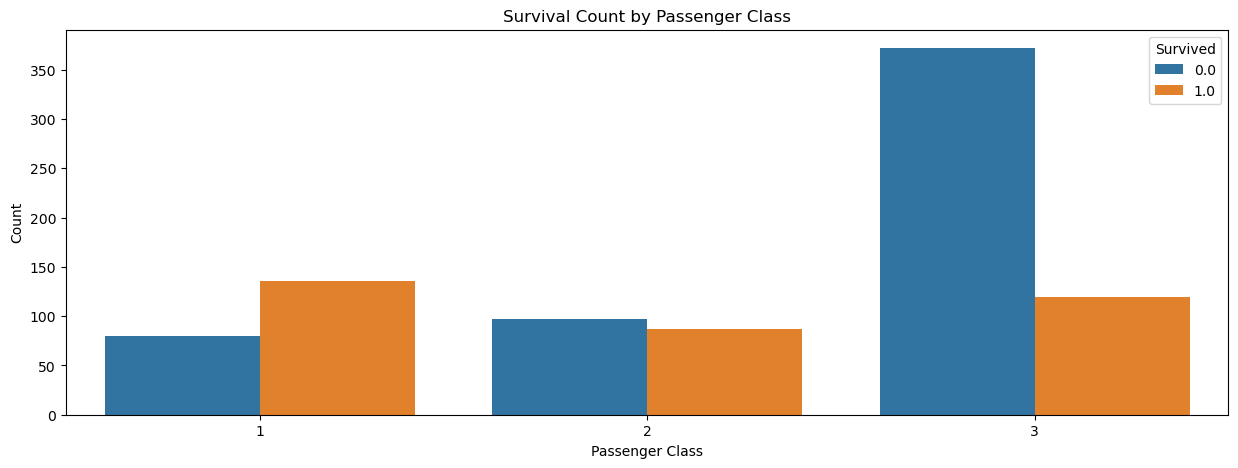

In [40]:
# Survival count by class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.rcParams['figure.figsize'] = 10, 5
plt.show()

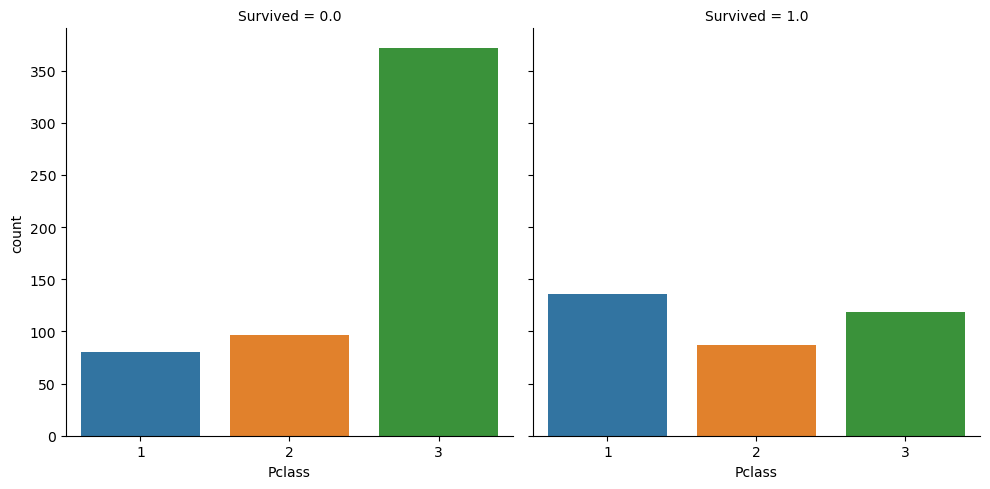

In [47]:
sns.catplot(x='Pclass', col='Survived', kind='count', data=df)
plt.show()

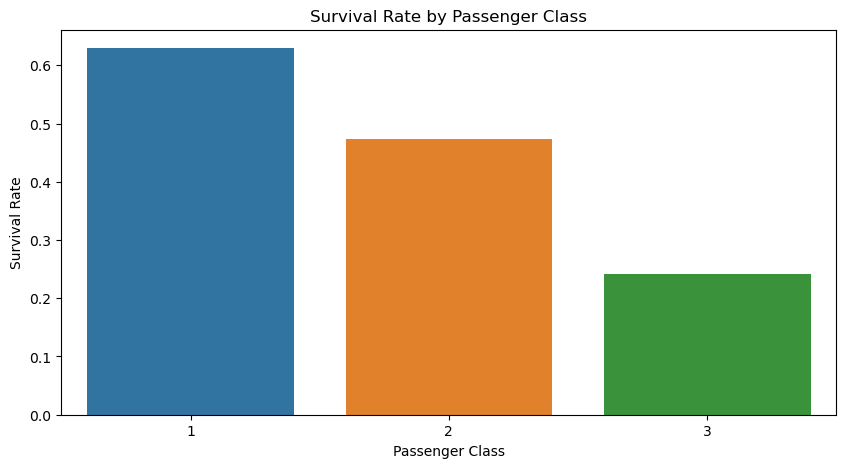

In [50]:
# Calculating the survival rate for each Pclass
pclass_survival = df.groupby('Pclass')['Survived'].mean()
sns.barplot(x=pclass_survival.index, y=pclass_survival.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.rcParams['figure.figsize'] = 10, 10
plt.show()

## Model 1 - Random Forest Classifier

In [109]:
# Load the train and test data
train_data = pd.read_csv("train.csv")

In [110]:
X_train, X_test, y_train, y_test = train_test_split(train_data[["Pclass", "Sex", "Age"]], train_data["Survived"], test_size=0.2, random_state=0)

In [111]:
X_test.head()

,Pclass,Sex,Age
495,3,male,NaN
648,3,male,NaN
278,3,male,7.0
31,1,female,NaN
255,3,female,29.0


In [112]:
# Encode the categorical feature "Sex" using one-hot encoding
X_train = pd.get_dummies(X_train, columns=["Sex"])
X_test = pd.get_dummies(X_test, columns=["Sex"])

In [113]:
# Fill in missing values in the "Age" column with the mean age
X_train["Age"].fillna(X_train["Age"].mean(), inplace=True)
X_test["Age"].fillna(X_test["Age"].mean(), inplace=True)

In [120]:
# Create the Random Forest classifier
model = RandomForestClassifier(random_state=0)

In [121]:
# Create a dictionary of parameters to be tuned
parameters = {"max_depth": [5, 10, 20], "min_samples_leaf": [1, 5, 10]}

In [122]:
# Use GridSearchCV to tune the parameters
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 5, 10]})

In [123]:
# Use the best parameters to make predictions on the test data
# Use the best parameters to make predictions on the validation and test data
y_test_pred = grid_search.predict(X_test)

In [124]:
# Calculate the accuracy, precision, and recall scores for the test sets


accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

print("Test set results:")
print("Accuracy: {:.2f}".format(accuracy_test))
print("Precision: {:.2f}".format(precision_test))
print("Recall: {:.2f}".format(recall_test))

Test set results:
Accuracy: 0.82
Precision: 0.81
Recall: 0.68


In [127]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=0)

In [128]:
# Print the feature importance
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.18084
Feature: 1, Score: 0.22000
Feature: 2, Score: 0.30429
Feature: 3, Score: 0.29487


## Model 2 - XGBoost

In [170]:
# Load the train and test data
train_data = pd.read_csv("train.csv")

In [171]:
X_train, X_test, y_train, y_test = train_test_split(train_data[["Pclass", "Sex", "Age"]], train_data["Survived"], test_size=0.3, random_state=0)

In [172]:
# Encode the categorical feature "Sex" using one-hot encoding
X_train = pd.get_dummies(X_train, columns=["Sex"])
X_test = pd.get_dummies(X_test, columns=["Sex"])

# Fill in missing values in the "Age" column with the mean age
X_train["Age"].fillna(X_train["Age"].mean(), inplace=True)
X_test["Age"].fillna(X_test["Age"].mean(), inplace=True)

In [179]:
params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [180]:
# Define the data matrix
dtrain = xgb.DMatrix(data=X_train, label=y_train)

# Perform parameter optimization
cv_results = xgb.cv(params, dtrain, num_boost_round=1000, nfold=5, metrics='error', early_stopping_rounds=50)

In [181]:
# Print the optimal number of trees
print("Optimal number of trees: ", cv_results.shape[0])

# Train the model with the optimal number of trees
best_model = xgb.XGBClassifier(eta=params['eta'],
                               max_depth=params['max_depth'],
                               min_child_weight=params['min_child_weight'],
                               objective=params['objective'],
                               nthread=params['nthread'],
                               verbosity=params['verbosity'])
best_model.fit(X_train, y_train)

Optimal number of trees:  94


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              nthread=8, num_parallel_tree=None, ...)

## Save as a bentoML Model

In [ ]:
bentoml.xgboost.save_model('titanic_ml',best_model)

In [155]:
## Thank you for reading this